In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import autogluon.core as ag
from autogluon.vision import ObjectDetector

In [3]:
dataset_train = ObjectDetector.Dataset.from_voc('~/VOCdevkit/VOC2012', splits='train')

In [4]:
from autogluon.core import Categorical, Real

# medium_quality_faster_train
#time_limit = 2*3600
#hyperparameters = { 'transfer': Categorical('ssd_512_resnet50_v1_coco'), 
#    'lr': 0.01, 'batch_size': Categorical(8, 16),
#    'epochs': 30, 'early_stop_patience': 5}
#hyperparamter_tune_kwargs={ 'num_trials': 16, 'search_strategy': 'random'}

# medium_quality_faster_inference
time_limit =4*3600
hyperparameters = {
    'transfer': Categorical('center_net_resnet18_v1b_coco', 'yolo3_mobilenet1.0_coco'),
    'lr': Categorical(0.01, 0.005, 0.001), 'batch_size': Categorical(32, 64, 128),
    'epochs': Categorical(30, 50), 'early_stop_patience': 10 }
hyperparamter_tune_kwargs={ 'num_trials': 32, 'search_strategy': 'bayesopt'}

detector = ObjectDetector()
detector.fit(dataset_train, time_limit=time_limit)

INFO:gluoncv.auto.tasks.object_detection:No GPU detected/allowed, using most conservative search space.
INFO:gluoncv.auto.tasks.object_detection:Randomly split train_data into train[590]/validation[74] splits.
INFO:gluoncv.auto.tasks.object_detection:Starting fit without HPO
INFO:SSDEstimator:modified configs(<old> != <new>): {
INFO:SSDEstimator:root.dataset_root    ~/.mxnet/datasets/ != auto
INFO:SSDEstimator:root.dataset         voc_tiny != auto
INFO:SSDEstimator:root.ssd.data_shape  300 != 512
INFO:SSDEstimator:root.ssd.base_network vgg16_atrous != mobilenet1.0
INFO:SSDEstimator:root.ssd.transfer    ssd_512_resnet50_v1_coco != ssd_512_mobilenet1.0_coco
INFO:SSDEstimator:root.train.epochs    20 != 5
INFO:SSDEstimator:root.train.early_stop_patience -1 != 10
INFO:SSDEstimator:root.train.seed      233 != 122
INFO:SSDEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:SSDEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:SSDEstimator:root.gpus            (0, 1, 2, 3) != ()
I

In [5]:
detector.save('face_detector.ag')

# Show results

In [6]:
from autogluon.vision import ObjectDetector

detector = ObjectDetector.load('face_detector.ag')

/home/jupyter/.local/lib/python3.7/site-packages/mxnet/gluon/block.py:1591: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from gluoncv.utils import viz

def show_bbox(detector, image_path, min_score):
    
    score_condition = f"predict_score >= {min_score}"
    result = detector.predict(image_path)
    print(result)
    result = result.query(score_condition)
    
    im = Image.open(image_path)
    width, height = im.size
    image = np.array(im)
    
    bboxes=[]
    for rois in result['predict_rois']:
        x1, y1 = int(rois['xmin']* width), int(rois['ymin']* height)
        x2, y2 = int(rois['xmax']* width), int(rois['ymax']* height)
        bboxes.append([x1, y1, x2, y2])
    bboxes = np.array(bboxes)
    
    scores = result['predict_score'].values
    labels , class_names = result['predict_class'].factorize()
    
    fig = plt.figure()
    ax = viz.plot_bbox(image, bboxes=bboxes, scores=scores, 
                   labels = labels, class_names=class_names)
    plt.show()

   predict_class  predict_score  \
0           head       0.974237   
1           head       0.838526   
2           head       0.812218   
3           head       0.398022   
4           head       0.347134   
..           ...            ...   
95          head       0.052970   
96          head       0.052806   
97          head       0.052732   
98          head       0.052389   
99          head       0.052115   

                                         predict_rois  
0   {'xmin': 0.6702321171760559, 'ymin': 0.0068992...  
1   {'xmin': 0.4810774624347687, 'ymin': 0.2160203...  
2   {'xmin': 0.564326286315918, 'ymin': 0.14885398...  
3   {'xmin': 0.7404307723045349, 'ymin': 0.0007219...  
4   {'xmin': 0.6314914226531982, 'ymin': 0.2983816...  
..                                                ...  
95  {'xmin': 0.2573634088039398, 'ymin': 0.0154854...  
96  {'xmin': 0.1407347023487091, 'ymin': 0.1047926...  
97  {'xmin': 0.9859663844108582, 'ymin': 0.0231071...  
98  {'xmin': 0.0904

<Figure size 432x288 with 0 Axes>

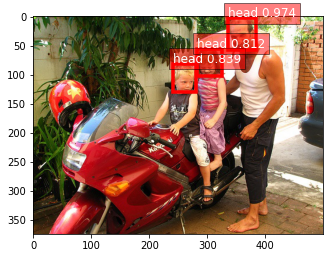

In [8]:
url = '~/tiny_motorbike/'
dataset_test = ObjectDetector.Dataset.from_voc(url, splits='test')
image_path = dataset_test.iloc[2]['image']
show_bbox(detector, image_path, 0.7)

   predict_class  predict_score  \
0           head       0.883978   
1           head       0.879368   
2           head       0.831804   
3           head       0.712322   
4           head       0.453353   
..           ...            ...   
95          head       0.055933   
96          head       0.055919   
97          head       0.055694   
98          head       0.055627   
99          head       0.055484   

                                         predict_rois  
0   {'xmin': 0.18332070112228394, 'ymin': 0.255727...  
1   {'xmin': 0.31293419003486633, 'ymin': 0.315662...  
2   {'xmin': 0.7661077380180359, 'ymin': 0.2567475...  
3   {'xmin': 0.6189416646957397, 'ymin': 0.2930104...  
4   {'xmin': 0.47421738505363464, 'ymin': 0.306640...  
..                                                ...  
95  {'xmin': 0.13435180485248566, 'ymin': 0.575194...  
96  {'xmin': 0.9757446646690369, 'ymin': 0.9612296...  
97  {'xmin': 0.0, 'ymin': 0.9128035306930542, 'xma...  
98  {'xmin': 0.5089

<Figure size 432x288 with 0 Axes>

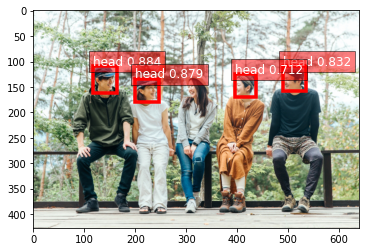

In [9]:
image_path = '/home/jupyter/img/4182543_s.jpg'
show_bbox(detector, image_path, 0.7)